<a href="https://colab.research.google.com/github/pharringtonp19/housing-and-homelessness/blob/main/notebooks/PIT_Chronic_Homelessness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Download Data**

In [1]:
!wget "https://www.huduser.gov/portal/sites/default/files/xls/2007-2024-PIT-Counts-by-State.xlsb"

--2025-09-02 17:07:55--  https://www.huduser.gov/portal/sites/default/files/xls/2007-2024-PIT-Counts-by-State.xlsb
Resolving www.huduser.gov (www.huduser.gov)... 3.140.166.205, 3.128.141.190
Connecting to www.huduser.gov (www.huduser.gov)|3.140.166.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2224540 (2.1M) [application/vnd.ms-excel.sheet.binary.macroEnabled.12]
Saving to: ‘2007-2024-PIT-Counts-by-State.xlsb’

2007-2024-PIT-Count 100%[===================>]   2.12M  10.0MB/s    in 0.2s    

2025-09-02 17:07:56 (10.0 MB/s) - ‘2007-2024-PIT-Counts-by-State.xlsb’ saved [2224540/2224540]



### **Install Libraries**

In [2]:
!pip install pyxlsb

### **Import Libraries**

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import userdata
from matplotlib import font_manager
import matplotlib.dates as mdates
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'viridis'
rcParams['axes.grid'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [4]:
df = pd.read_excel('2007-2024-PIT-Counts-by-State.xlsb', sheet_name=str(2015))
df.head()

State  Number of CoCs Overall Homeless Overall Homeless - Under 18  \
0    AK               2             1956                         411   
1    AL               8             3970                         716   
2    AR               7             2560                         417   
3    AS               0                                                
4    AZ               3             9896                        2124   

  Overall Homeless - Age 18 to 24 Overall Homeless - Over 24  \
0                             197                       1348   
1                             271                       2983   
2                             243                       1900   
3                                                              
4                             824                       6948   

  Overall Homeless - Woman Overall Homeless - Man  \
0                      773                   1181   
1                     1532                   2427   
2                      978                   1582   
3                                                   
4                     3966                   5916   

  Overall Homeless - Transgender Overall Homeless - Non-Hispanic/Latina/e/o  \
0                              2                                       1862   
1                             11                                       3901   
2                              0                                       2143   
3                                                                             
4                             14                                       7516   

   ... Overall Homeless Parenting Youth Age 18-24  \
0  ...                                         18   
1  ...                                         20   
2  ...                                         22   
3  ...                                              
4  ...                                        160   

  Sheltered ES Homeless Parenting Youth Age 18-24  \
0                                               8   
1                                               7   
2                                              17   
3                                                   
4                                              43   

  Sheltered TH Homeless Parenting Youth Age 18-24  \
0                                              10   
1                                               9   
2                                               5   
3                                                   
4                                             107   

  Sheltered Total Homeless Parenting Youth Age 18-24  \
0                                                 18   
1                                                 16   
2                                                 22   
3                                                      
4                                                150   

  Unsheltered Homeless Parenting Youth Age 18-24  \
0                                              0   
1                                              4   
2                                              0   
3                                                  
4                                             10   

  Overall Homeless Children of Parenting Youth  \
0                                           21   
1                                           35   
2                                           20   
3                                                
4                                          194   

  Sheltered ES Homeless Children of Parenting Youth  \
0                                                 9   
1                                                12   
2                                                10   
3                                                     
4                                                51   

  Sheltered TH Homeless Children of Parenting Youth  \
0                                                12   
1                                        

In [8]:
[col for col in df.columns if "Chronic" in col]

['Overall Chronically Homeless',
 'Sheltered ES Chronically Homeless',
 'Sheltered SH Chronically Homeless',
 'Sheltered Total Chronically Homeless',
 'Unsheltered Chronically Homeless',
 'Overall Chronically Homeless Individuals',
 'Sheltered ES Chronically Homeless Individuals',
 'Sheltered SH Chronically Homeless Individuals',
 'Sheltered Total Chronically Homeless Individuals',
 'Unsheltered Chronically Homeless Individuals',
 'Overall Chronically Homeless People in Families',
 'Sheltered ES Chronically Homeless People in Families',
 'Sheltered Total Chronically Homeless People in Families',
 'Unsheltered Chronically Homeless People in Families']

### **Read In Data**

In [18]:
results = []
years = np.arange(2011, 2025)
years = list(years)
years.remove(2021)
years = np.array(years)
for year in years:
  df = pd.read_excel('2007-2024-PIT-Counts-by-State.xlsb', sheet_name=str(year))
  condition = df['State'] == 'Total'
  new_df = df[condition]
  num = new_df['Overall Chronically Homeless'].values.item()
  results.append(num)

### **Plot**

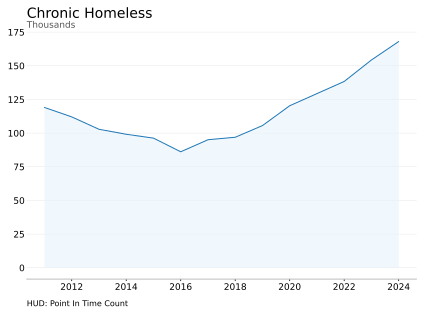

In [20]:
x = pd.to_datetime(years, format='%Y')
y = np.array(results) / 1e3

# --- NYT-style colors ---
line_color = '#1f77b4'
fill_color = "#e6f1fb"
forecast_fill = "#dfeaf7"
grid_color = '#e6e6e6'

fig, ax = plt.subplots(figsize=(7, 4.5), dpi=300)
ax.set_facecolor("white")
fig.patch.set_facecolor("white")

# area + line
ax.fill_between(x, 0, y, color=fill_color, linewidth=0, zorder=1, alpha=0.6)
ax.yaxis.grid(True, color=grid_color, linewidth=.5, zorder=2)
ax.plot(x, y, color=line_color, linewidth=1, zorder=3,
        solid_capstyle="round", solid_joinstyle="round")

# spines & ticks (keep only a subtle bottom spine)
for side in ("top", "left", "right"):
    ax.spines[side].set_visible(False)
ax.spines["bottom"].set_color("#bdbdbd")
ax.spines["bottom"].set_linewidth(1)

ax.tick_params(axis="x", length=2, labelsize=9, pad=2)
ax.tick_params(axis="y", length=0, labelsize=9, pad=2)


# tidy limits
ax.set_axisbelow(True)            # any future gridlines stay behind

# title + subtitle (left-aligned)
ax.text(0., 1.05, s='Chronic Homeless', transform=ax.transAxes, size=14)
ax.text(0, 1.01, "Thousands", transform=ax.transAxes,
        fontsize=9, color="#555555")

ax.annotate("HUD: Point In Time Count",
        xy = (0., -0.1),
        xycoords='axes fraction',
        ha='left',
        va="center",
        fontsize=8)

plt.ticklabel_format(style='plain', axis='y')  # <- disable sci notation on y-axis

fig.savefig("chronic_homelessness.png", bbox_inches="tight", dpi=300)
plt.show()